In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Question1
- The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
- a)Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
- b)Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India. 
- c)Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India. 
- d)Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

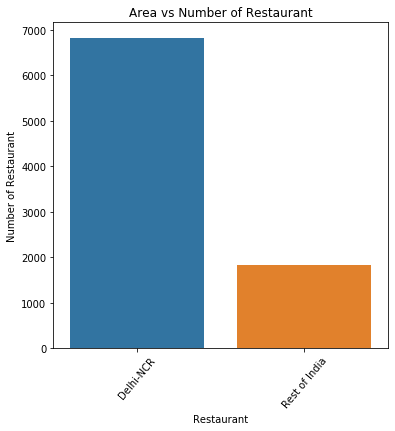

In [28]:
#question1(a)
def separateCity(city):
    if city=='New Delhi' or city=='Ghaziabad' or city=='Faridabad' or city=='Noida':
        return "Delhi-NCR"
    else:
        return "Rest of India"
seperate_data=data[data['Country Code']==1].copy()
seperate_data['City']=seperate_data['City'].apply(separateCity)
plt.subplots(figsize=(6,6))
sns.countplot(seperate_data["City"],order=seperate_data["City"].value_counts().index)
plt.xticks(rotation=50)
plt.title('Area vs Number of Restaurant')
plt.xlabel("Restaurant")
plt.ylabel("Number of Restaurant")
plt.show()

In [40]:
#Question1(b)
delhi_ncr_cuisine=set()
rest_of_india_cuisine=set()
for i in seperate_data[seperate_data['City']=='Delhi-NCR']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        delhi_ncr_cuisine.add(j.strip())
for i in seperate_data[seperate_data['City']=='Rest of India']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        rest_of_india_cuisine.add(j.strip())    
## Cuisine not present in Delhi NCR but present in rest of india
cuisine_not_present=[]
for i in rest_of_india_cuisine:
    if i not in delhi_ncr_cuisine:
        cuisine_not_present.append(i)
#zomato API key - dfe06b91f39685dc511b520cf31fa859
## Getting the list of cuisines actually present in Delhi NCR using Zomato API.
import requests
header={"User-Agent": "curl/7.43.0",'Accept': 'application/json','user-key':'dfe06b91f39685dc511b520cf31fa859'}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params={'city_id':1})
response=response.json()
cuisines_delhi_ncr=[]
for i in response.get('cuisines'):
    cuisines_delhi_ncr.append(i.get('cuisine').get('cuisine_name'))
for i in cuisine_not_present:
    if i not in cuisines_delhi_ncr:
        print(i)
#response['cuisines']


Persian
Greek
German
Cajun
Charcoal Grill


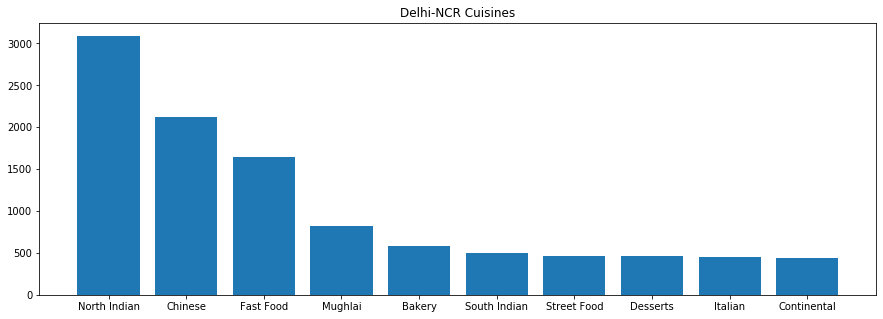

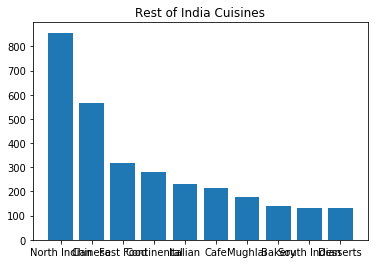

In [49]:
#Question1(c)
delhi_ncr_cuisine={}
rest_of_india_cuisine={}
for i in seperate_data[seperate_data['City']=='Delhi-NCR']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in delhi_ncr_cuisine:
            delhi_ncr_cuisine[j.strip()]+=1;
        else:
            delhi_ncr_cuisine[j.strip()]=1
for i in seperate_data[seperate_data['City']=='Rest of India']['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in rest_of_india_cuisine:
            rest_of_india_cuisine[j.strip()]+=1;
        else:
            rest_of_india_cuisine[j.strip()]=1
#convert dictionary into list of list
top_delhi_10=pd.DataFrame(data=list(zip(list(delhi_ncr_cuisine.keys()),list(delhi_ncr_cuisine.values())))).sort_values(by=1,ascending=False)
top_rest_10=pd.DataFrame(data=list(zip(list(rest_of_india_cuisine.keys()),list(rest_of_india_cuisine.values())))).sort_values(by=1,ascending=False)   
#top_delhi_10.head()
x_delhi=top_delhi_10[0].values[0:10]
y_delhi=top_delhi_10[1].values[0:10]
plt.subplots(figsize=(15,5))
plt.bar(x_delhi,y_delhi)
plt.title("Delhi-NCR Cuisines")
plt.show()
x_rest=top_rest_10[0].values[0:10]
y_rest=top_rest_10[1].values[0:10]
plt.bar(x_rest,y_rest)
plt.title("Rest of India Cuisines")
plt.show()

# Question1(d)
- ---->Delhi-NCR
- -->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Bakery, South Indian, Street Food, Desserts
- ---->Rest of India
- -->Top 9 Cuisines : North Indian, Chinese, Fast Food, Mughlai, Continental, Italian, Bakery, Cafe, South Indian
- Cuisine Not Present
- From above result cuisines like Charcoal Grill,Cajun,Persian and Malwani not present in Delhi NCR but present in Rest of India.

# Question2
- User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
- a)Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
    - i)Number of Votes given Restaurant 
    - ii)Restaurant serving more number of cuisines. 
    - iii)Average Cost of Restaurant 
    - iv)Restaurant serving some specific cuisines. 
- b)Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating? Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

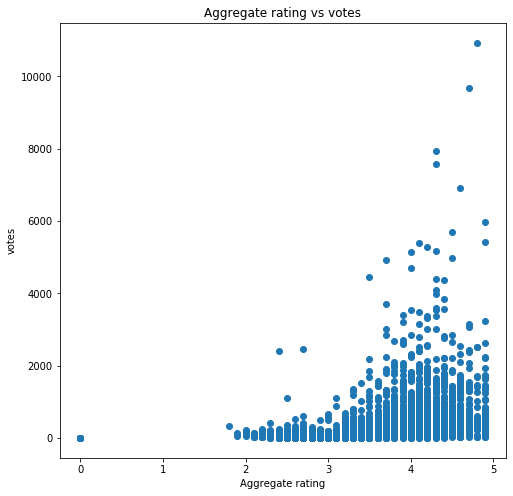

In [51]:
#Question2(a)(i)
#Number of Votes given Restaurant
x=data['Aggregate rating']
y=data['Votes']
plt.subplots(figsize=(8,8))
plt.scatter(x,y)
plt.title('Aggregate rating vs votes')
plt.xlabel('Aggregate rating')
plt.ylabel('votes')
plt.show()

- In general trend more number of votes signify restaturant provide good serivice
- From the graph we can see that if Number of votes is greater than 4000 then restaurant rating lie between 3.5-5.0
- If Number of Votes is greater than 6000 then restaurant rating lie between 4-5
- More number of votes means more rating

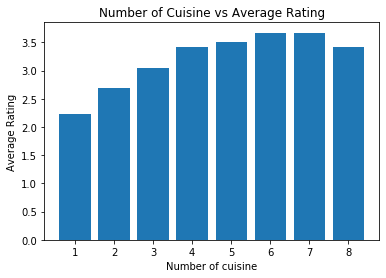

More Number of Cusine, Higer will be the Rate Restaruant.


In [52]:
#Question2(a)(ii)
data_rating=data.copy()
data_rating.dropna(inplace=True)
def getNoCuisine(cuisine):
    cuisine_list=cuisine.split(',')
    return len(cuisine_list)
data_rating['Number_Cuisines']=data_rating['Cuisines'].apply(getNoCuisine)
num_cuisine=np.arange(1,9)
average_rating=[]
for i in num_cuisine:
    average_rating.append(data_rating[data_rating['Number_Cuisines']==i]['Aggregate rating'].mean())
plt.bar(num_cuisine,average_rating)
plt.xlabel("Number of cuisine")
plt.ylabel("Average Rating")
plt.title("Number of Cuisine vs Average Rating")
plt.show()
print("More Number of Cusine, Higer will be the Rate Restaruant.")

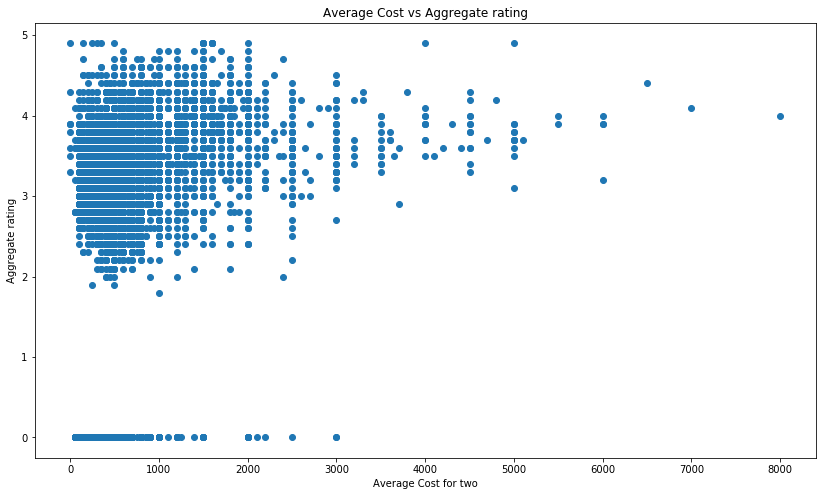

In [53]:
#Question2(a)(iii)
data_india=data[data['Country Code']==1]
x=data_india['Average Cost for two']
y=data_india['Aggregate rating']
plt.subplots(figsize=(14,8))
plt.title('Average Cost vs Aggregate rating')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate rating')
plt.scatter(x,y)
plt.show()

- From the above graph, we can see that most of the data is clustered around cost upto 2000 and rating values from 2 to 4.5 approximately.

['North Indian' 'Chinese' 'Fast Food' 'Mughlai' 'Italian' 'Bakery'
 'Continental' 'Cafe' 'Desserts' 'South Indian' 'Street Food' 'American'
 'Pizza' 'Mithai']


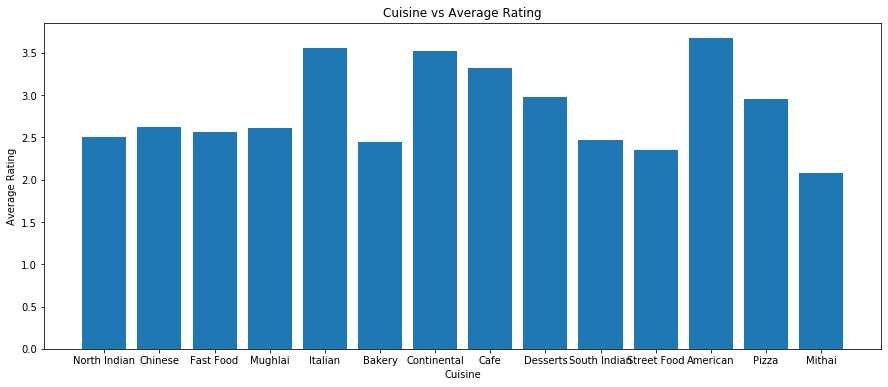

In [54]:
#Question2a(iv)
d=data.copy()
d.dropna(inplace=True)
cuisine_dict={}
for i in d['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in cuisine_dict:
            cuisine_dict[j.strip()]+=1;
        else:
            cuisine_dict[j.strip()]=1
#Lets take out average rating of  cuisines served in number of restaurant > 250 that present in our dataset
top_cuisine_10=pd.DataFrame(data=list(zip(list(cuisine_dict.keys()),list(cuisine_dict.values())))).sort_values(by=1,ascending=False)
y=top_cuisine_10[1].values
index=0
for j in range(len(y)):
    if y[j]<250:
        index=j-1
        break;
cuisine_list=top_cuisine_10[0].values[0:index]
print(cuisine_list)

dataa=list(zip(d['Cuisines'],d['Aggregate rating']))
average_rating=[]
for cuisine in cuisine_list:
    sum=0;
    count=0
    for i in range(len(dataa)):
        if cuisine in dataa[i][0]:
            sum=sum+dataa[i][1]
            count=count+1
    average_rating.append(sum/count)  
plt.subplots(figsize=(15,6))
plt.bar(cuisine_list,average_rating)
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.title("Cuisine vs Average Rating")
plt.show()

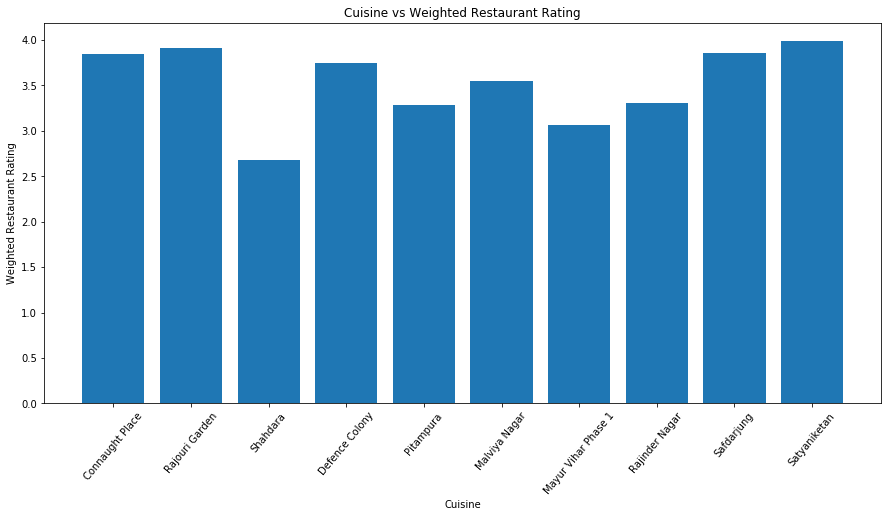

In [61]:
#Question2(b)
d=list(zip(data['Locality'],data['Aggregate rating'],data['Votes']))
index=0
values=data['Locality'].value_counts().values
for i in range(len(values)):
    if values[i]<50:
        index=i-1
        break
locality_list=data['Locality'].value_counts().index[0:index]
weightage_rating=[]
for locality in locality_list:
    NRate=0
    Tvote=0
    for i in range(len(d)):
        if locality in d[i][0]:
            NRate=NRate+(d[i][1]*d[i][2])
            Tvote=Tvote+d[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
plt.subplots(figsize=(15,7))
plt.bar(locality_list[0:10],weightage_rating[0:10])
plt.xticks(rotation=50)
plt.xlabel("Cuisine")
plt.ylabel("Weighted Restaurant Rating")
plt.title("Cuisine vs Weighted Restaurant Rating")
plt.show()

# Question3
- a. Plot the bar graph top 15 restaurants have a maximum number of outlets.
- b. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).  
- c Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble

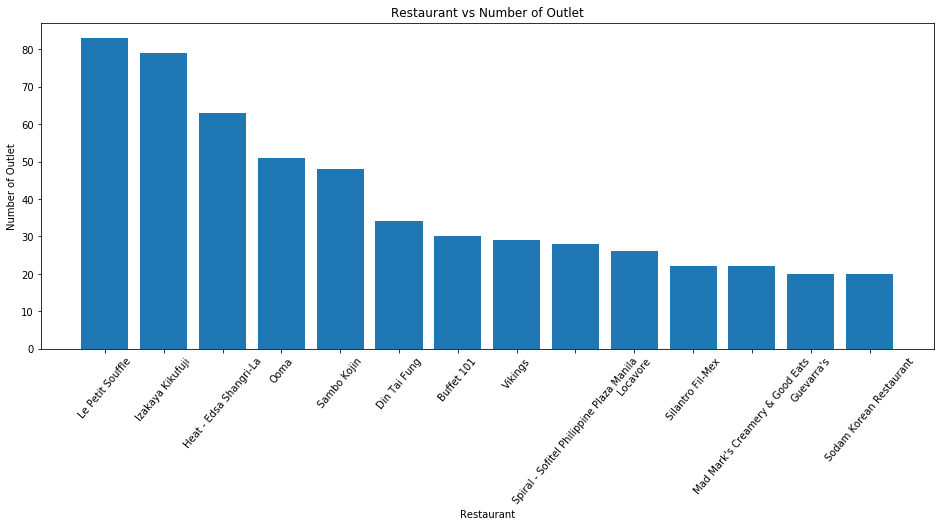

In [62]:
#question3(a)
d=data['Restaurant Name'].value_counts()[0:15]
plt.subplots(figsize=(16,6))
plt.xticks(rotation=50)
plt.bar(data['Restaurant Name'][0:15],d)
plt.ylabel("Number of Outlet")
plt.xlabel("Restaurant")
plt.title("Restaurant vs Number of Outlet")
plt.show()


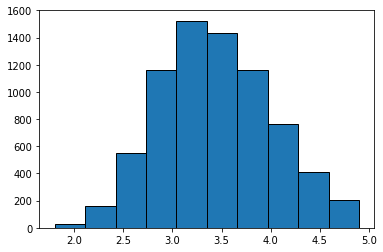

In [63]:
#Question3(b)
zomato_rated=data[data['Aggregate rating']!=0]
plt.hist(zomato_rated['Aggregate rating'].values,bins=10,edgecolor='black')
plt.show()

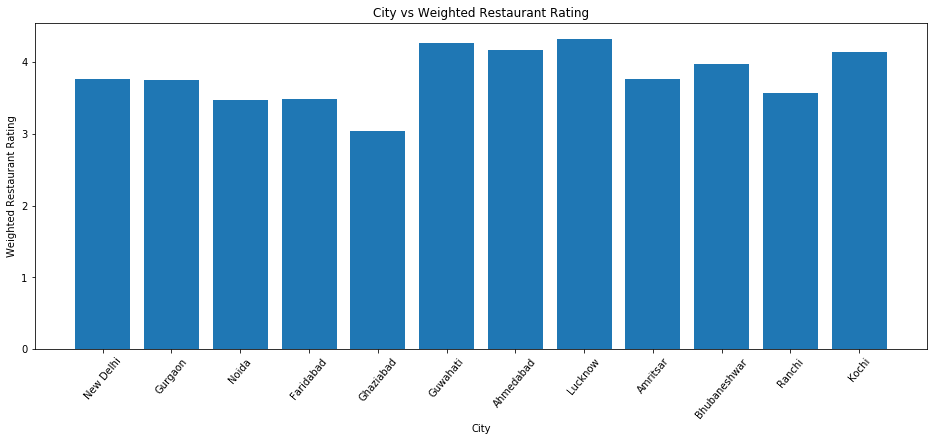

In [72]:
#question3(c)
data=pd.read_csv('zomato.csv',encoding="ISO-8859-1")
zomato_india=data[data['Country Code']==1]
city_list=zomato_india['City'].value_counts().index
d=list(zip(zomato_india['City'],zomato_india['Aggregate rating'],zomato_india['Votes']))
weightage_rating=[]
for city in city_list:
    NRate=0
    Tvote=0
    for i in range(len(d)):
        if city in d[i][0]:
            NRate=NRate+(d[i][1]*d[i][2])
            Tvote=Tvote+d[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
plt.subplots(figsize=(16,6))
plt.xticks(rotation=50)
plt.bar(city_list[0:12],weightage_rating[0:12])
plt.xlabel("City")
plt.ylabel("Weighted Restaurant Rating")
plt.title("City vs Weighted Restaurant Rating")
plt.show()